In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize
import time

def balls(R=4,r1=1,r2=1,rho1=1,rho2=1):
    np.random.seed(int(time.time()))


    m1 = rho1*r1**3
    m2 = rho2*r2**3


    def obj_func(phi):
        w1 = - m1 * (R - r1) * np.sin(phi[0])
        w2 = - m2 * (R - r2) * np.sin(phi[1])
        return w1 + w2


    def obj_grad(phi):
        grad = np.zeros_like(phi)
        grad[0] = - m1 * (R - r1) * np.cos(phi[0])
        grad[1] = - m2 * (R - r2) * np.cos(phi[1])
        return grad


    def obj_hess(phi):
        hess = np.zeros((2, 2))
        hess[0][0] = m1 * (R - r1) * np.sin(phi[0])
        hess[1][1] = m2 * (R - r2) * np.sin(phi[1])
        return hess


    def cons_func(phi):
        v1 = R - r1
        v2 = R - r2
        temp = v1 ** 2 + v2 ** 2 - 2 * v1 * v2 * np.cos(phi[0] - phi[1])
        return np.sqrt(temp)


    def cons_grad(phi):
        grad = np.zeros_like(phi)
        v1 = R - r1
        v2 = R - r2
        grad[0] = v1 * v2 * np.sin(phi[0] - phi[1]) / cons_func(phi)
        grad[1] = - grad[0]
        return grad


    def cons_hess(phi, v):
        hess = np.zeros((2, 2))
        v1 = R - r1
        v2 = R - r2
        f_value = cons_func(phi)
        grad = cons_grad(phi)
        sin = np.sin(phi[0] - phi[1])
        cos = np.cos(phi[0] - phi[1])

        hess[0][0] = hess[1][1] = (v1 * v2 * cos * f_value - v1 * v2 * sin * grad[0]) / (f_value ** 2)
        hess[0][1] = hess[1][0] = (- v1 * v2 * cos * f_value + v1 * v2 * sin * grad[0]) / (f_value ** 2)
        return v[0] * hess


    linear_constraint = LinearConstraint([[1, 0], [0, 1]], [0, 0], [2 * np.pi, 2 * np.pi])
    nonlinear_constraint = NonlinearConstraint(cons_func, r1 + r2, np.inf, jac=cons_grad, hess=cons_hess)
    phi1 = np.random.uniform(0, np.pi / 2)
    phi2 = np.random.uniform(np.pi / 2, np.pi)
    phi0 = [phi1, phi2]
    print('initial condition:',phi0)
    res = minimize(obj_func, phi0, method='trust-constr', jac=obj_grad, hess=obj_hess,
                   constraints=[linear_constraint, nonlinear_constraint], options={'verbose': 0})

    def angle2Pos(ang,R,r):
        x = (R-r)*np.cos(ang)
        y = R-(R-r)*np.sin(ang)
        return (x,y)
    
    def getCOM(m1,p1,m2,p2):
        ratio = m2/(m1+m2)
        x1,y1=p1
        x2,y2=p2
        xc = x1+ratio*(x2-x1)
        yc = y1+ratio*(y2-y1)
        return (xc,yc)
    
    xgrid = np.linspace(-R,R,R*100)
    bowl = R-np.sqrt(R**2-xgrid**2)
    pos1 = angle2Pos(res.x[0],R,r1)
    pos2 = angle2Pos(res.x[1],R,r2)
    pcom = getCOM(m1,pos1,m2,pos2)
    
    fig = plt.figure(figsize=(10,10))
    plt.plot(xgrid,bowl,'k')
    plt.plot([0,0],[0,R],'g--',linewidth=0.5,label='x=0')
    plt.plot([pos1[0],0],[pos1[1],R],'k--',linewidth=0.8)
    plt.plot([pos2[0],0],[pos2[1],R],'k--',linewidth=0.8)
    plt.plot([pos1[0],pos2[0]],[pos1[1],pos2[1]],'k--',linewidth=0.8)
#     plt.plot([0,R],[R,R],'k-',linewidth=1)
    plt.plot(pcom[0],pcom[1],'ro',label='center of mass')
    fig.axes[0].set_aspect('equal')
    plt.ylim=(0,2*R)
    plt.xlim=(-R,R)
    fig.axes[0].add_patch(Circle(pos1,r1,color='#a6ff0c'))
    fig.axes[0].add_patch(Circle(pos2,r2,color='#07fff7'))
    plt.legend()
    plt.show()
    print('ball1 mass: %.3f\tcoord:(%.3f, %.3f)'%(m1,pos1[0],pos1[1]))
    print('ball2 mass: %.3f\tcoord:(%.3f, %.3f)'%(m2,pos2[0],pos2[1]))
    print('center of mass corrd: (%.3f,%.3f)'%pcom)

initial condition: [0.5880303813070137, 2.081788333676083]


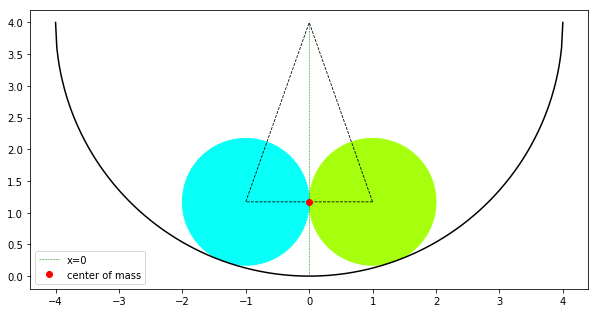

ball1 mass: 1.000	coord:(1.000, 1.172)
ball2 mass: 1.000	coord:(-1.000, 1.172)
center of mass corrd: (-0.000,1.172)


In [2]:
balls(R=4,r1=1,r2=1,rho1=1,rho2=1)

initial condition: [0.5880303813070137, 2.081788333676083]


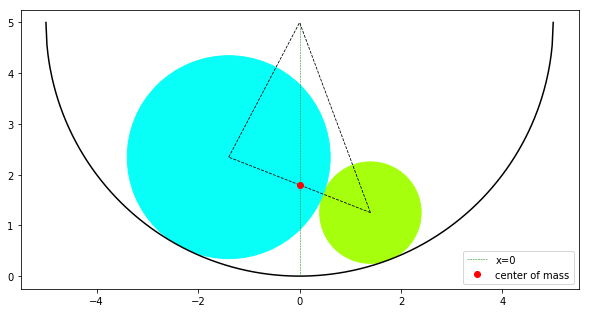

ball1 mass: 1.000	coord:(1.397, 1.252)
ball2 mass: 1.000	coord:(-1.397, 2.345)
center of mass corrd: (-0.000,1.798)


In [3]:
balls(R=5,r1=1,r2=2,rho1=1,rho2=1/8)

initial condition: [1.4916409501762735, 2.8596390105946696]


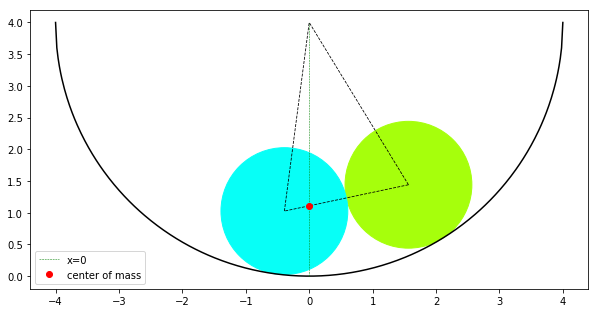

ball1 mass: 1.000	coord:(1.565, 1.441)
ball2 mass: 4.000	coord:(-0.391, 1.026)
center of mass corrd: (-0.000,1.109)


In [4]:
balls(R=4,r1=1,r2=1,rho1=1,rho2=4)

initial condition: [1.286817857815189, 2.9103352337351462]


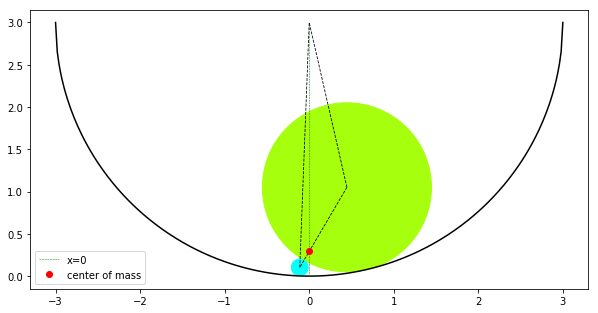

ball1 mass: 1.000	coord:(0.446, 1.050)
ball2 mass: 4.000	coord:(-0.112, 0.102)
center of mass corrd: (-0.000,0.292)


In [6]:
balls(R=3,r1=1,r2=0.1,rho1=1,rho2=4000)